## Real Estate Analysis 

The following R notebook is an analysis on the price of houses depending on their position and other feautures.

The features that I will consider are the following:
- the age of the house
- the distance from the station
- the number of shops in the area
- the latitude
- the longitude

In [2]:
library(tidyverse)
library(AER)
library(ggplot2)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.4     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.0
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Caricamento del pacchetto richiesto: car

Caricamento del pacchetto richiesto: carData


Caricamento pacchetto: 'car'


Il seguente oggetto `e mascherato da 'package:dplyr':

    recode


Il seguente oggetto `e mascherato da 'package:purrr':

    some


Caricamento del pacchetto richiesto: lmtest

Caricamento del pacchetto richiesto: zoo


Caricamento pacchetto: 'zoo'


I seguenti oggetti sono mascherati da 'package:base':

    as.Date, as.Date.numeric


Caricamento del p

In [3]:
path <- "/Users/matteomontrucchio/Desktop/Real estate.csv"
housedata <- read.csv(path)

In [4]:
head(housedata)

,No,date,age,dist_station,n_stores,lat,long,price
,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,1,2012.917,32.0,84.87882,10,24.98298,121.5402,37.9
2,2,2012.917,19.5,306.59470,9,24.98034,121.5395,42.2
3,3,2013.583,13.3,561.98450,5,24.98746,121.5439,47.3
4,4,2013.500,13.3,561.98450,5,24.98746,121.5439,54.8
5,5,2012.833,5.0,390.56840,5,24.97937,121.5425,43.1
6,6,2012.667,7.1,2175.03000,3,24.96305,121.5125,32.1


In [5]:
summary(housedata)

       No             date           age          dist_station    
 Min.   :  1.0   Min.   :2013   Min.   : 0.000   Min.   :  23.38  
 1st Qu.:104.2   1st Qu.:2013   1st Qu.: 9.025   1st Qu.: 289.32  
 Median :207.5   Median :2013   Median :16.100   Median : 492.23  
 Mean   :207.5   Mean   :2013   Mean   :17.713   Mean   :1083.89  
 3rd Qu.:310.8   3rd Qu.:2013   3rd Qu.:28.150   3rd Qu.:1454.28  
 Max.   :414.0   Max.   :2014   Max.   :43.800   Max.   :6488.02  
    n_stores           lat             long           price       
 Min.   : 0.000   Min.   :24.93   Min.   :121.5   Min.   :  7.60  
 1st Qu.: 1.000   1st Qu.:24.96   1st Qu.:121.5   1st Qu.: 27.70  
 Median : 4.000   Median :24.97   Median :121.5   Median : 38.45  
 Mean   : 4.094   Mean   :24.97   Mean   :121.5   Mean   : 37.98  
 3rd Qu.: 6.000   3rd Qu.:24.98   3rd Qu.:121.5   3rd Qu.: 46.60  
 Max.   :10.000   Max.   :25.01   Max.   :121.6   Max.   :117.50  

`geom_smooth()` using formula = 'y ~ x'


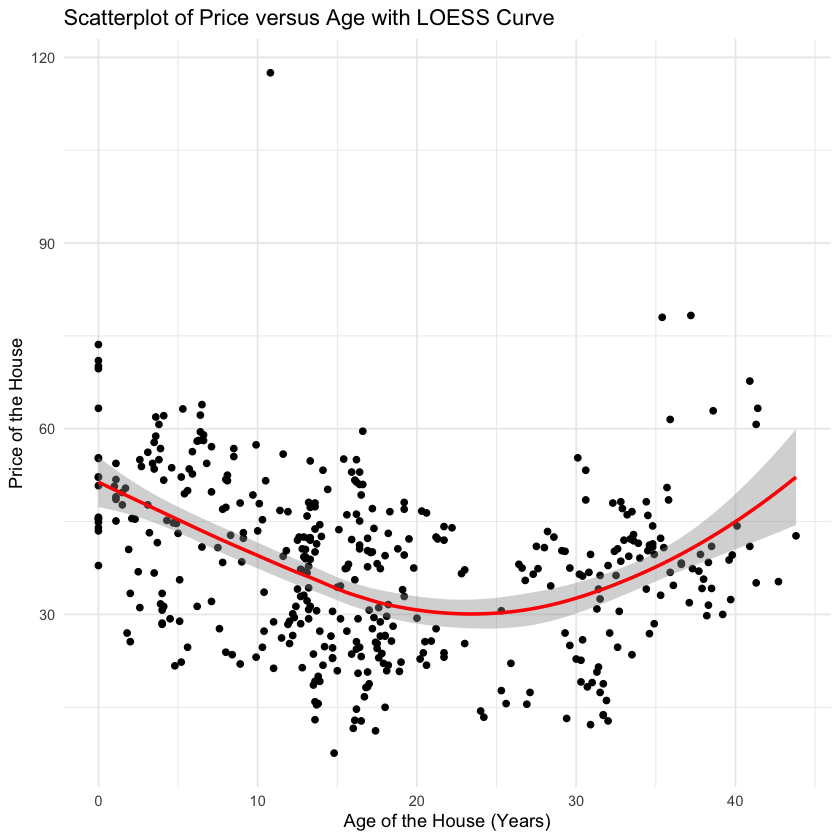

In [6]:
ggplot(housedata, aes(x = age, y = price)) +
  geom_point() +              
  geom_smooth(method = "loess", 
              color = "red") + 
  labs(title = "Scatterplot of Price versus Age with LOESS Curve",
       x = "Age of the House (Years)",
       y = "Price of the House") +
  theme_minimal()

The graph shows how the value of an house decreases as the time goes by, however, after 25 years the house starts to reacquire value in the market.

Therefore, I decided to generate a new variable "OLD" if the age of the house is greater than the median age and I will test the hypothesis that average prices are different for old and non-old units.

In [7]:
housedata <- housedata %>%
  mutate(old = ifelse(age > median(age),1,0))

In [8]:
model <- lm(price~old, data=housedata)
summary(model)


Call:
lm(formula = price ~ old, data = housedata)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.605 -10.085   1.345   8.065  76.295 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  41.2048     0.9173  44.918  < 2e-16 ***
old          -6.4805     1.3005  -4.983 9.22e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 13.23 on 412 degrees of freedom
Multiple R-squared:  0.05685,	Adjusted R-squared:  0.05456 
F-statistic: 24.83 on 1 and 412 DF,  p-value: 9.222e-07


Being a old house has a negatuve effect on the price as shown by the summary of the model.

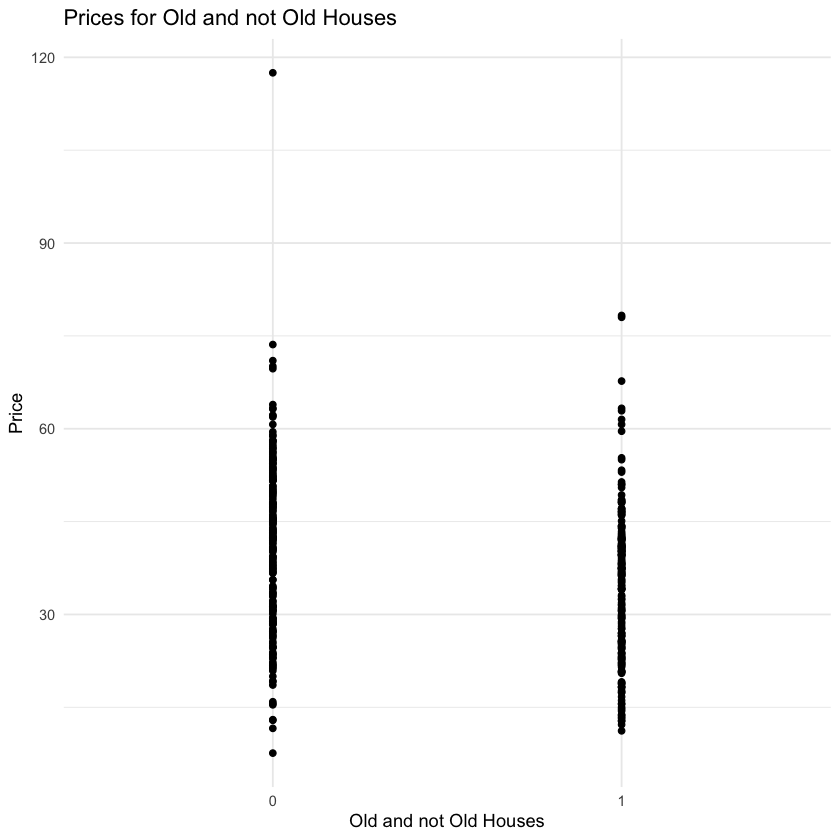

In [9]:
ggplot(housedata, aes(x = as.factor(old), y = price)) +
  geom_point() +
  labs(title = "Prices for Old and not Old Houses",
       x = "Old and not Old Houses",
       y = "Price") +
  theme_minimal()

I will run a regression of price on age

In [10]:
summary(lm(price ~ age, data = housedata))


Call:
lm(formula = price ~ age, data = housedata)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.113 -10.738   1.626   8.199  77.781 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.43470    1.21098  35.042  < 2e-16 ***
age         -0.25149    0.05752  -4.372 1.56e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 13.32 on 412 degrees of freedom
Multiple R-squared:  0.04434,	Adjusted R-squared:  0.04202 
F-statistic: 19.11 on 1 and 412 DF,  p-value: 1.56e-05


An age increase has a negative effect on the price of the house

I add to the regression the distance to the station and the number of stores

In [11]:
summary(lm(price ~ age + dist_station + n_stores, data = housedata))


Call:
lm(formula = price ~ age + dist_station + n_stores, data = housedata)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.304  -5.430  -1.738   4.325  77.315 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  42.977286   1.384542  31.041  < 2e-16 ***
age          -0.252856   0.040105  -6.305 7.47e-10 ***
dist_station -0.005379   0.000453 -11.874  < 2e-16 ***
n_stores      1.297443   0.194290   6.678 7.91e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.251 on 410 degrees of freedom
Multiple R-squared:  0.5411,	Adjusted R-squared:  0.5377 
F-statistic: 161.1 on 3 and 410 DF,  p-value: < 2.2e-16


The summary of the model indicates how the distance from the station has a negative effect, while the number of stores has a positive effect.

From the graph made at the beginning of the analysis, we see how, after a certain age, the houses start to acquire value again. To check this, I will run a regression anaysis including the squared element (age^2)

In [12]:
summary(nlm<-lm(price~age+I(age^2)+dist_station+n_stores, data=housedata))


Call:
lm(formula = price ~ age + I(age^2) + dist_station + n_stores, 
    data = housedata)

Residuals:
    Min      1Q  Median      3Q     Max 
-34.638  -5.441  -0.936   4.410  78.586 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  47.8652717  1.6100774  29.729  < 2e-16 ***
age          -1.0445863  0.1500836  -6.960 1.36e-11 ***
I(age^2)      0.0198921  0.0036429   5.461 8.25e-08 ***
dist_station -0.0048255  0.0004495 -10.736  < 2e-16 ***
n_stores      1.2288454  0.1882215   6.529 1.97e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.942 on 409 degrees of freedom
Multiple R-squared:  0.5722,	Adjusted R-squared:  0.5681 
F-statistic: 136.8 on 4 and 409 DF,  p-value: < 2.2e-16


The age squared value is positive and significant.

Now, It is interesting to see if there is any difference between the north and south side of the city.
I create the varibale ***south*** if the latitude is smaller than 24.97 

In [13]:
housedata <- housedata %>%
  mutate(south = ifelse(lat < 24.97,1,0))

In [14]:
summary(lm(price ~ south + age + I(age^2) + dist_station + n_stores, data=housedata))


Call:
lm(formula = price ~ south + age + I(age^2) + dist_station + 
    n_stores, data = housedata)

Residuals:
    Min      1Q  Median      3Q     Max 
-30.382  -4.748  -0.871   3.367  76.048 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  50.0981340  1.5475862  32.372  < 2e-16 ***
south        -6.8463010  0.9417473  -7.270 1.85e-12 ***
age          -1.0290305  0.1414050  -7.277 1.76e-12 ***
I(age^2)      0.0185848  0.0034365   5.408 1.09e-07 ***
dist_station -0.0036437  0.0004536  -8.033 1.03e-14 ***
n_stores      1.2203285  0.1773212   6.882 2.23e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.424 on 408 degrees of freedom
Multiple R-squared:  0.6213,	Adjusted R-squared:  0.6167 
F-statistic: 133.9 on 5 and 408 DF,  p-value: < 2.2e-16


The effect of being in the south is negative on the price of the house.
Now I will also check the interaction between the south and age variable.

In [15]:
summary(lm(price ~ south + (age + I(age^2)) * south + dist_station + n_stores, data = housedata))


Call:
lm(formula = price ~ south + (age + I(age^2)) * south + dist_station + 
    n_stores, data = housedata)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.675  -4.398  -0.747   3.271  75.425 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    50.5664669  1.7515856  28.869  < 2e-16 ***
south          -7.7135457  2.3173419  -3.329 0.000952 ***
age            -0.9897636  0.1820248  -5.438 9.35e-08 ***
I(age^2)        0.0161888  0.0043502   3.721 0.000226 ***
dist_station   -0.0036037  0.0004566  -7.893 2.78e-14 ***
n_stores        1.2195199  0.1775197   6.870 2.43e-11 ***
south:age      -0.1447993  0.2819889  -0.513 0.607886    
south:I(age^2)  0.0080694  0.0069310   1.164 0.245008    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.381 on 406 degrees of freedom
Multiple R-squared:  0.627,	Adjusted R-squared:  0.6206 
F-statistic:  97.5 on 7 and 406 DF,  p-value: < 2.2e-16


Being in the south has an additional negative effect on the age variable and a positive effect on the squared age. However, the two elements are not statistically significant.